<a href="https://colab.research.google.com/github/alvaro-salgado/PCD_MCD/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1


## Obtener los tweets de Bitcoin.

In [1]:
import tweepy
import pandas as pd

In [5]:
# Autenticación con Bearer Token
client = tweepy.Client(bearer_token=BEARER_TOKEN)

In [6]:
# Parámetros de búsqueda
query = "#Bitcoin -is:retweet lang:en"
max_results = 100  # Máximo número de tweets por solicitud
tweets_data = []

In [7]:
# Solicitar tweets
response = client.search_recent_tweets(query=query, max_results=max_results, tweet_fields=['created_at', 'author_id', 'text'])

In [8]:
# Procesar los resultados
for tweet in response.data:
    tweets_data.append({
        "fecha": tweet.created_at,
        "usuario_id": tweet.author_id,
        "texto": tweet.text
    })

In [9]:
# Guardar los datos en un archivo CSV
df = pd.DataFrame(tweets_data)
df.to_csv("tweets_bitcoin.csv", index=False)
print("Datos recolectados y guardados en tweets_bitcoin.csv")

Datos recolectados y guardados en tweets_bitcoin.csv


In [10]:
tweets = pd.read_csv("tweets_bitcoin.csv")
tweets

,fecha,usuario_id,texto
0,2025-01-15 04:21:58+00:00,1868975975351853056,I’m not in a hurry; I want a love worth waitin...
1,2025-01-15 04:21:57+00:00,1556282034292924416,#Tether is taking legal action against Swan #B...
2,2025-01-15 04:21:57+00:00,1868962756872847360,"My heart is open, ready for a love that will m..."
3,2025-01-15 04:21:39+00:00,1868971765860339712,Life is really simple. but we insist on maing ...
4,2025-01-15 04:21:36+00:00,1842285967195185152,stick to the plan 🚀 #Bitcoin https://t.co/MKCA...
...,...,...,...
95,2025-01-15 04:16:08+00:00,1584921954,Florida #Bitcoin reserve happening!! 🚀 https:/...
96,2025-01-15 04:15:52+00:00,1868923726731067392,We’re expecting a heatwave this weeend.\n\n#bi...
97,2025-01-15 04:15:50+00:00,918393979611287552,@bycoinhunter @Chain_GPT Best #launchpad Platf...
98,2025-01-15 04:15:49+00:00,1733842056500400128,#LINKUSDT\n\nEntry: 18.588 \n\nTarget 1: 19.01...


## Preprocesamiento

In [17]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [25]:
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Eliminar menciones (usuarios de Twitter) y hashtags
    text = re.sub(r'@[\w]*|#[\w]*', '', text)

    # Eliminar números y puntuación
    text = re.sub(r'[0-9]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace("’", "")

    # Tokenización (convertir el texto en palabras)
    tokens = word_tokenize(text)

    # Eliminar stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematización (reducir palabras a su raíz)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]


    # Unir las palabras procesadas en un solo string
    return ' '.join(tokens)

In [26]:
# Aplicar preprocesamiento a cada tweet
df['texto_limpio'] = df['texto'].apply(preprocess_text)

# Mostrar los primeros 5 tweets preprocesados
df[['texto', 'texto_limpio']].head()

,texto,texto_limpio
0,I’m not in a hurry; I want a love worth waitin...,im hurry want love worth waiting
1,#Tether is taking legal action against Swan #B...,taking legal action swan contractual dispute t...
2,"My heart is open, ready for a love that will m...",heart open ready love make beat faster
3,Life is really simple. but we insist on maing ...,life really simple insist maing complicated
4,stick to the plan 🚀 #Bitcoin https://t.co/MKCA...,stick plan 🚀


## Análisis de los datos


In [27]:
from textblob import TextBlob

# Función para obtener el sentimiento
def get_sentiment(text):
    # Crear un objeto TextBlob
    blob = TextBlob(text)

    # Obtener el polartiy del sentimiento (-1 negativo, 1 positivo)
    sentiment = blob.sentiment.polarity

    # Clasificación simple: negativo, neutral, positivo
    if sentiment > 0:
        return "Positivo"
    elif sentiment == 0:
        return "Neutral"
    else:
        return "Negativo"

# Aplicar análisis de sentimientos a los tweets
df['sentimiento'] = df['texto_limpio'].apply(get_sentiment)

# Ver los primeros resultados
df[['texto_limpio', 'sentimiento']].head()

,texto_limpio,sentimiento
0,im hurry want love worth waiting,Positivo
1,taking legal action swan contractual dispute t...,Positivo
2,heart open ready love make beat faster,Positivo
3,life really simple insist maing complicated,Negativo
4,stick plan 🚀,Neutral


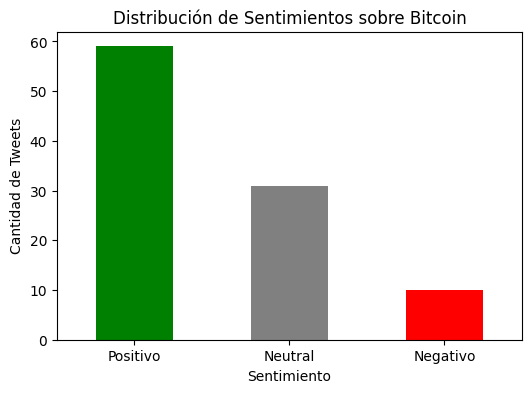

In [28]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada sentimiento
sentiment_counts = df['sentimiento'].value_counts()

# Graficar la distribución de sentimientos
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribución de Sentimientos sobre Bitcoin')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')
plt.xticks(rotation=0)
plt.show()

In [29]:
!pip install wordcloud

In [31]:
from collections import Counter

# Unir todos los tweets preprocesados en un solo texto
all_text = ' '.join(df['texto_limpio'])

# Tokenizar el texto en palabras
words = word_tokenize(all_text)

# Eliminar las stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and word.isalpha()]  # Solo palabras, no números ni signos

# Contar las frecuencias de las palabras
word_counts = Counter(filtered_words)

# Obtener las 10 palabras más comunes
most_common_words = word_counts.most_common(10)

# Convertir a un dataframe para facilidad de visualización
import pandas as pd
df_word_counts = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])

# Mostrar las 10 palabras más frecuentes
df_word_counts

,Palabra,Frecuencia
0,target,45
1,high,26
2,new,24
3,btc,21
4,price,21
5,bitcoin,19
6,next,15
7,due,14
8,fund,14
9,action,13


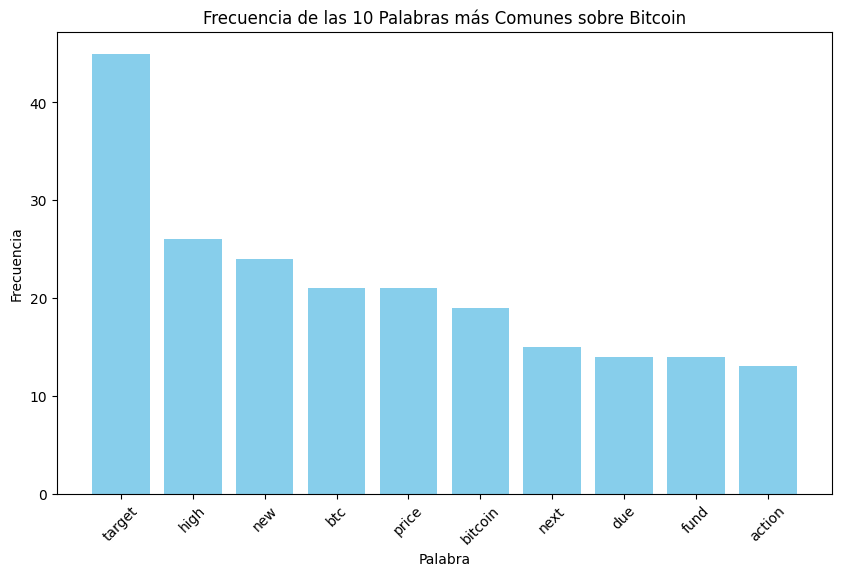

In [32]:
import matplotlib.pyplot as plt

# Graficar las 10 palabras más comunes
plt.figure(figsize=(10, 6))
plt.bar(df_word_counts['Palabra'], df_word_counts['Frecuencia'], color='skyblue')
plt.title('Frecuencia de las 10 Palabras más Comunes sobre Bitcoin')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

## Obtener las noticias

In [59]:
!pip install requests

In [ ]:
import requests
import json
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('vader_lexicon')

In [70]:
# URL base de News API
url = 'https://newsapi.org/v2/everything'

# Parámetros para la solicitud
params = {
    'q': 'Bitcoin',
    'apiKey': API_KEY,
    'pageSize': 100,
    'language': 'en',
    'sortBy': 'publishedAt',
}

# Hacer la solicitud GET
response = requests.get(url, params=params)

# Hacer el procesamiento y análisis


Las 10 palabras más comunes:
bitcoin: 42
crypto: 20
xrp: 9
us: 8
says: 8
price: 8
etfs: 8
k: 7
market: 7
trump: 7


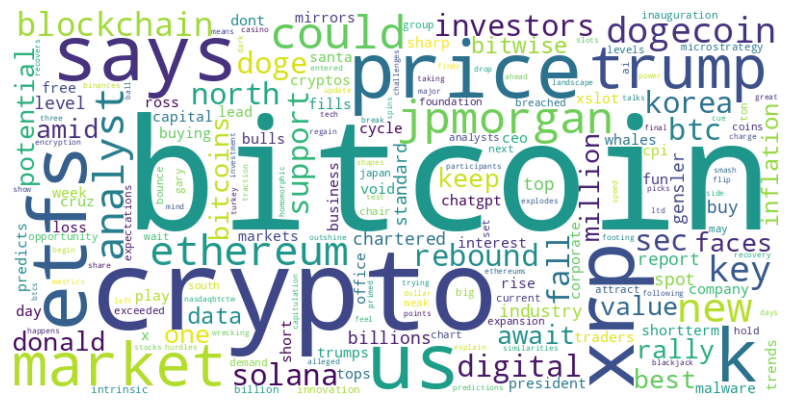

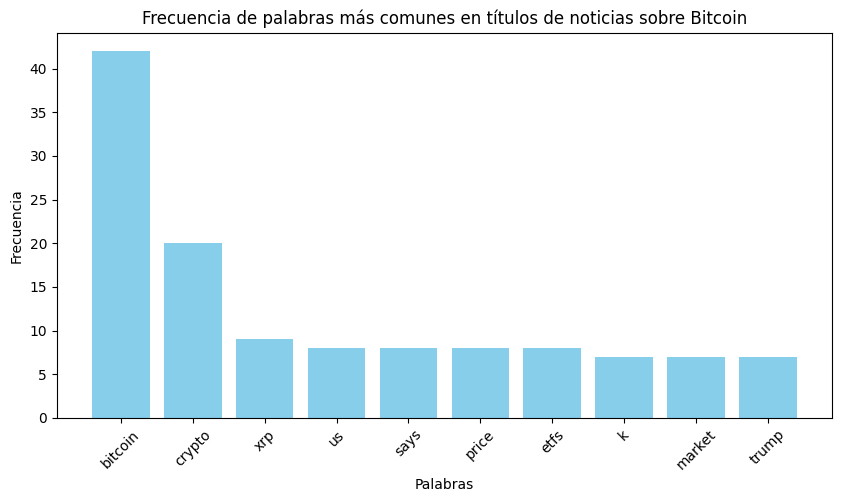


Sentimientos en los títulos de las noticias sobre Bitcoin:
Positivos: 35
Neutrales: 42
Negativos: 23


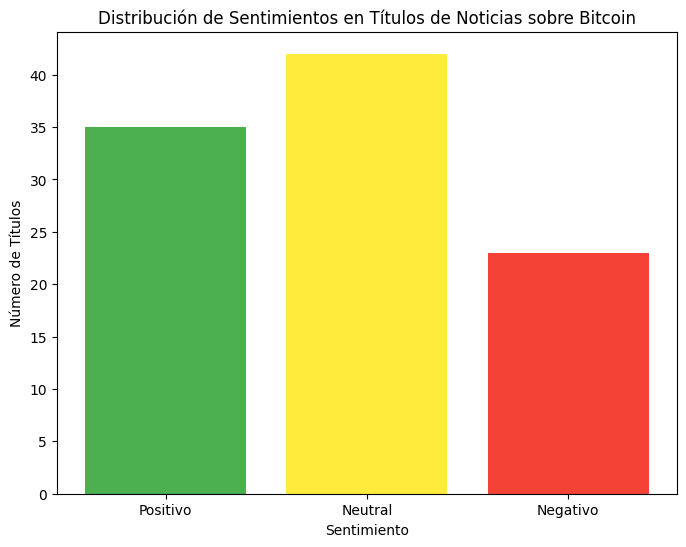

In [71]:
# Comprobar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()
    articles = data['articles']  # Lista de artículos obtenidos

    # Extraer títulos de las noticias
    titles = [article['title'] for article in articles]

    # Preprocesar los títulos (convertir a minúsculas, eliminar caracteres especiales)
    processed_titles = []
    for title in titles:
        title = title.lower()  # Convertir a minúsculas
        title = re.sub(r'[^a-zA-Z\s]', '', title)  # Eliminar caracteres no alfabéticos
        processed_titles.append(title)

    # Tokenizar (dividir en palabras)
    words = ' '.join(processed_titles).split()

    # Eliminar stopwords (palabras vacías)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Contar la frecuencia de las palabras
    word_counts = Counter(words)

    # Mostrar las 10 palabras más comunes
    print("\nLas 10 palabras más comunes:")
    for word, count in word_counts.most_common(10):
        print(f"{word}: {count}")

    # Crear una nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    # Crear un gráfico de barras de las palabras más comunes
    top_words = word_counts.most_common(10)
    words, counts = zip(*top_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title('Frecuencia de palabras más comunes en títulos de noticias sobre Bitcoin')
    plt.xticks(rotation=45)
    plt.show()

    # Análisis de sentimientos usando VADER
    sia = SentimentIntensityAnalyzer()

    # Análisis de sentimiento de cada título
    sentiments = []
    for title in titles:
        sentiment = sia.polarity_scores(title)
        sentiments.append(sentiment['compound'])  # Usamos el score compuesto

    # Clasificar los sentimientos
    positive = len([s for s in sentiments if s > 0.05])
    neutral = len([s for s in sentiments if -0.05 <= s <= 0.05])
    negative = len([s for s in sentiments if s < -0.05])

    # Mostrar el análisis de sentimientos
    print(f"\nSentimientos en los títulos de las noticias sobre Bitcoin:")
    print(f"Positivos: {positive}")
    print(f"Neutrales: {neutral}")
    print(f"Negativos: {negative}")

    # Visualización de los resultados de sentimiento en un gráfico de barras
    sentiment_labels = ['Positivo', 'Neutral', 'Negativo']
    sentiment_counts = [positive, neutral, negative]

    plt.figure(figsize=(8, 6))
    plt.bar(sentiment_labels, sentiment_counts, color=['#4CAF50', '#FFEB3B', '#F44336'])
    plt.title("Distribución de Sentimientos en Títulos de Noticias sobre Bitcoin")
    plt.xlabel('Sentimiento')
    plt.ylabel('Número de Títulos')
    plt.show()

else:
    print(f"Error en la solicitud: {response.status_code}")